Imports

In [1]:
import math
import csv
import pandas as pd
import numpy as np
import itertools
# from google.colab import files

Mounting drive to retrieve data

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')





read in data

In [9]:
trans_data = pd.read_csv('/Users/jackmayr/PycharmProjects/my_juypter_notebooks/csc_395/data/Assoc_Analysis_Vidhya.dat.csv', header = None)
trans_data = trans_data.drop(columns = [0])
trans_data

,1,2,3,4,5,6,7
0,Bread,Wine,Eggs,Meat,Cheese,Pencil,Diaper
1,Bread,Cheese,Meat,Diaper,Wine,Milk,Pencil
2,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
3,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
4,Meat,Pencil,Wine,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
310,Bread,Eggs,Cheese,NaN,NaN,NaN,NaN
311,Meat,Milk,Pencil,NaN,NaN,NaN,NaN
312,Bread,Cheese,Eggs,Meat,Pencil,Diaper,Wine
313,Meat,Cheese,NaN,NaN,NaN,NaN,NaN


getting a list of all unique items in an itemset

In [10]:
col_idx = []

for i in range(len(trans_data.columns)-1):
  col_idx.append(i+1)
items = (pd.unique(trans_data[col_idx].values.ravel('K')))
items = pd.DataFrame(items)
items = items.dropna()

items = items[0].tolist()
items

['Bread',
 'Cheese',
 'Meat',
 'Eggs',
 'Wine',
 'Bagel',
 'Pencil',
 'Diaper',
 'Milk']

Function to calculate the support for subsets

In [11]:
def support_calc(data, obj_list):
  sup_val = 0
  for i in range(len(data)):
    if(set(obj_list).issubset(set(list(data.loc[i])))):
      sup_val += 1
  return sup_val / len(data)


function to prune subsets that don't meet the minimum support

In [12]:
def pruning(subset_dict, min_support):
  keys_to_delete = []
  for key in subset_dict:
    if subset_dict[key] < min_support:
      keys_to_delete.append(list(key))
  for i in keys_to_delete:
    del subset_dict[tuple(i)]
  return subset_dict



The function one_item_subset creates all possible one item subsets of the unique items found in our transaction data.  It then calculates the support for each of these subsets. 

The function multi_item_subset creates a list of all possible combinations for for a certain number of items in a subset, and then looks back at dictionary with subsets of one less item to see if we should evaluate this subsetset going forward.  We then generate a dictionary with all subsets we deem okay and then prune ones that don't meet minimum support.  This dictionary becomes the value to the key of the item number of each subset in this dictionary.  

The all_subsets dictionary is organized by having the outermost keys as the number of items in subsets 

{1: {('Bread'): 0.4, ('Wine') 0.3} 2:{('Bread', 'Wine'): 0.2}} etc

This way, I can easily look at subsets of one size smaller to see what are valid subsets to look at

In [13]:
def one_item_subset(item_list, transaction_data):
  sing_subset_dict = {}
  for i in range(len(item_list)):
    key = tuple([item_list[i]])
    #print(key)
    sup_val = round(support_calc(transaction_data, list(key)), 4)
    sing_subset_dict[key] = sup_val
  return sing_subset_dict

def multi_item_subset(item_list, transaction_data, support_dict, min_support):
  for i in range(2,len(item_list)):
    local_sup_dict = {}
    subset_size = i
    subset_list = []
    for subset in itertools.combinations(item_list, i):
      subset_list.append(list(subset))

    
    for j in range(len(subset_list)):
     
      for k in support_dict[i-1]:
        
        #print(subset_list[j], list(k), support_dict[i-1][k])
        if (set(list(k)).issubset(set(list(subset_list[j])))):
          key = tuple(subset_list[j])
          #print(key)
          sup_val = round(support_calc(transaction_data, key), 4)
          local_sup_dict[key] = sup_val
    local_sup_dict = pruning(local_sup_dict, min_support)
    support_dict[i] = local_sup_dict
  return support_dict


In [14]:
all_subsets = {}
min_support = 0.05
added = one_item_subset(items, trans_data)
all_subsets[1] = added
#print(all_subsets[1]['Bread'])
all_subsets = multi_item_subset(items, trans_data, all_subsets, min_support)
all_subsets

{1: {('Bread',): 0.5048,
  ('Cheese',): 0.5016,
  ('Meat',): 0.4762,
  ('Eggs',): 0.4381,
  ('Wine',): 0.4381,
  ('Bagel',): 0.4254,
  ('Pencil',): 0.3619,
  ('Diaper',): 0.4063,
  ('Milk',): 0.5016},
 2: {('Bread', 'Cheese'): 0.2381,
  ('Bread', 'Meat'): 0.2063,
  ('Bread', 'Eggs'): 0.1873,
  ('Bread', 'Wine'): 0.2444,
  ('Bread', 'Bagel'): 0.2794,
  ('Bread', 'Pencil'): 0.2,
  ('Bread', 'Diaper'): 0.2317,
  ('Bread', 'Milk'): 0.2794,
  ('Cheese', 'Meat'): 0.3238,
  ('Cheese', 'Eggs'): 0.2984,
  ('Cheese', 'Wine'): 0.2698,
  ('Cheese', 'Bagel'): 0.1937,
  ('Cheese', 'Pencil'): 0.2,
  ('Cheese', 'Diaper'): 0.2,
  ('Cheese', 'Milk'): 0.3048,
  ('Meat', 'Eggs'): 0.2667,
  ('Meat', 'Wine'): 0.2508,
  ('Meat', 'Bagel'): 0.1905,
  ('Meat', 'Pencil'): 0.1778,
  ('Meat', 'Diaper'): 0.1937,
  ('Meat', 'Milk'): 0.2444,
  ('Eggs', 'Wine'): 0.2413,
  ('Eggs', 'Bagel'): 0.1524,
  ('Eggs', 'Pencil'): 0.1651,
  ('Eggs', 'Diaper'): 0.1619,
  ('Eggs', 'Milk'): 0.2444,
  ('Wine', 'Bagel'): 0.1714,
  ('

In [15]:
def gen_confidence(itemsets_dict):
  confidence_df = pd.DataFrame(columns = ['Antecedent','Item Added', 'Current Set', 'Support', 'Confidence'])
  for i in range(2, len(itemsets_dict)):
    set_size = i
    antecendent_size = i-1
    for key1 in itemsets_dict[set_size]:
      for key2 in itemsets_dict[antecendent_size]:
        if (set(list(key2)).issubset(set(list(key1)))):
          curr_sup = itemsets_dict[set_size][key1]
          antecedent_sup = itemsets_dict[antecendent_size][key2]
          diff = tuple(set(list(key1)) - set(list(key2)))
          conf_calc = curr_sup / antecedent_sup
          row = [key2, diff, key1, curr_sup, conf_calc]
          confidence_df.loc[len(confidence_df.index)] = row


  return confidence_df





In [16]:
output_df = gen_confidence(all_subsets)

In [17]:
output_df = output_df.sort_values(by = 'Confidence', ascending=False)
output_df[:20]

,Antecedent,Item Added,Current Set,Support,Confidence
511,"(Meat, Eggs, Milk)","(Cheese,)","(Cheese, Meat, Eggs, Milk)",0.1524,0.857143
439,"(Meat, Diaper, Milk)","(Bread,)","(Bread, Meat, Diaper, Milk)",0.0540,0.850394
173,"(Meat, Milk)","(Cheese,)","(Cheese, Meat, Milk)",0.2032,0.831424
158,"(Meat, Eggs)","(Cheese,)","(Cheese, Meat, Eggs)",0.2159,0.809524
188,"(Eggs, Milk)","(Cheese,)","(Cheese, Eggs, Milk)",0.1968,0.805237
527,"(Meat, Wine, Milk)","(Cheese,)","(Cheese, Meat, Wine, Milk)",0.1016,0.800000
541,"(Cheese, Eggs, Pencil)","(Wine,)","(Cheese, Eggs, Wine, Pencil)",0.0857,0.794254
647,"(Meat, Eggs, Wine, Milk)","(Cheese,)","(Cheese, Meat, Eggs, Wine, Milk)",0.0730,0.792617
510,"(Cheese, Eggs, Milk)","(Meat,)","(Cheese, Meat, Eggs, Milk)",0.1524,0.774390
622,"(Eggs, Pencil, Diaper)","(Wine,)","(Eggs, Wine, Pencil, Diaper)",0.0635,0.769697


Create dictionaries with the number of subsets of each size, as well as average support for each subset size

In [18]:
total_dict = {}
for i in range(1, len(all_subsets)):
  total_dict[i] = len(all_subsets[i])
total_dict

avg_supp_dict = {}
for i in range(1, len(all_subsets)):
  if total_dict[i] >0:
    avg_supp_dict[i] = round(sum(all_subsets[i].values()) / float(total_dict[i]), 4)
  else:
    avg_supp_dict[i] = 0
avg_supp_dict

{1: 0.4504, 2: 0.2177, 3: 0.1107, 4: 0.067, 5: 0.058, 6: 0, 7: 0}

In [20]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Frequent Itemsets by Length')

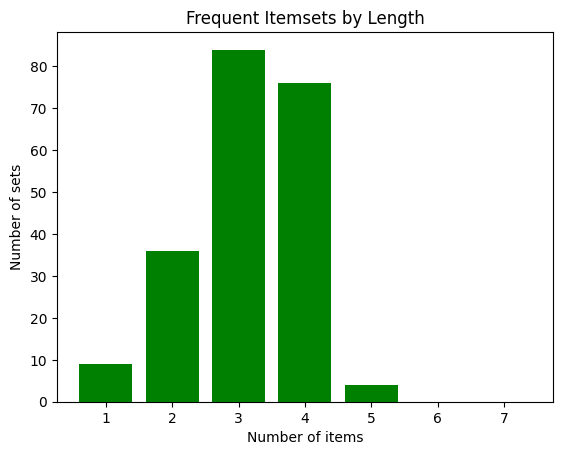

In [21]:
plt.bar(total_dict.keys(), total_dict.values(), color='g')
plt.xlabel('Number of items')
plt.ylabel('Number of sets')
plt.title('Frequent Itemsets by Length')
# plt.savefig("/content/drive/My Drive/CSC373_DMP_Mayr_Jack/DMP_Association_Analysis/num_frequent_itemsets.png")
# files.download("/content/drive/My Drive/CSC373_DMP_Mayr_Jack/DMP_Association_Analysis/num_frequent_itemsets.png")

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/CSC373_DMP_Mayr_Jack/DMP_Association_Analysis/frequent_itemsets_support.png'

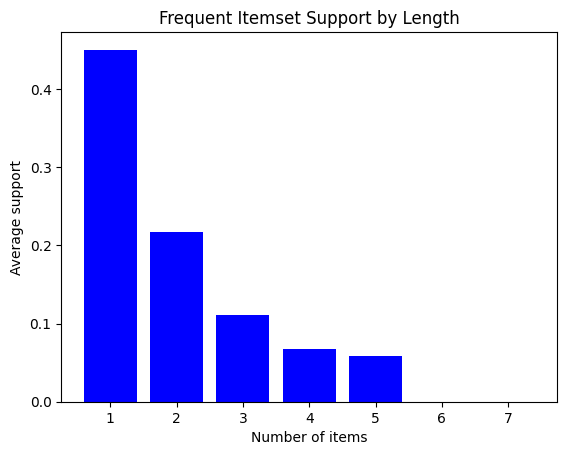

In [22]:
plt.bar(avg_supp_dict.keys(), avg_supp_dict.values(), color='b')
plt.xlabel('Number of items')
plt.ylabel('Average support')
plt.title('Frequent Itemset Support by Length')
plt.savefig("/content/drive/My Drive/CSC373_DMP_Mayr_Jack/DMP_Association_Analysis/frequent_itemsets_support.png")
files.download("/content/drive/My Drive/CSC373_DMP_Mayr_Jack/DMP_Association_Analysis/frequent_itemsets_support.png")

Text(0.5, 1.0, 'Support vs Confidence Scatterplot')

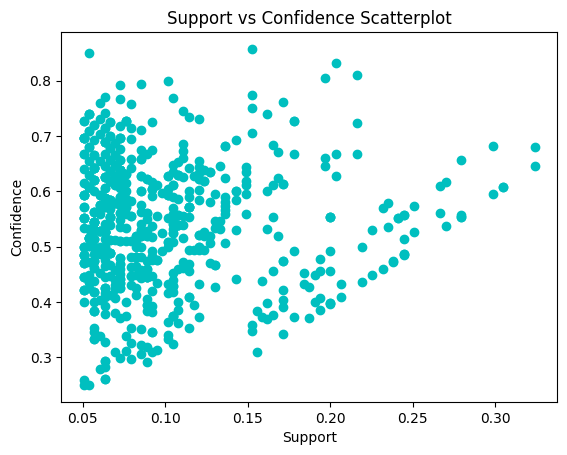

In [23]:
plt.scatter(output_df['Support'], output_df['Confidence'], color='c')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence Scatterplot')
# plt.savefig("/content/drive/My Drive/CSC373_DMP_Mayr_Jack/DMP_Association_Analysis/support_vs_confidence.png")
# files.download("/content/drive/My Drive/CSC373_DMP_Mayr_Jack/DMP_Association_Analysis/support_vs_confidence.png")

In [24]:
# output_df[:20].to_csv('apriori_output.csv')
# !cp apriori_output.csv "/content/drive/My Drive/CSC373_DMP_Mayr_Jack/DMP_Association_Analysis/"